<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP1 - Intégration numérique</center></h1>

## Nom des membres de l'équipe:

### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as cte

# Introduction : 

La radiothérapie externe est une méthode employée notamment dans le domaine de la radio-oncologie au CHUM pour le traitement du cancer. La radiothérapie externe traite les tumeurs au moyen de faisceaux de rayons-X, d'électrons ou de hadrons. La protonthérapie, quant à elle, est une branche spécifique de la radiothérapie visant à traiter les tumeurs peu profondes telles que les mélanomes oculaires à l'aide de faisceaux de protons de faible énergie. Cette technique permet d'optimiser la ballistique du faisceau afin de cibler la tumeur tout en épargnant les tissus sains.

Dans cette étude, on cherche à planifier et prédire la dose reçue par un patient suivant un traitement de protonthérapie. Pour ce faire, la portée des protons dans la matière est déterminée à l'aide de méthodes d'intégration numérique, soit la méthode des trapèzes et la méthode de Simpson. Par la suite, les algorithmes sont comparés à une distribution de Moyal. Le calcul de l'énergie déposée par le faisceau de protons à la tumeur est réalisé à partir de son énergie cinétique. Finalement, le réalisme du modèle d'intégration numérique développé est discuté.

# Équations utiles :

Pouvoir d'arrêt collisionnel massique :

\begin{align}
\frac{S_{col}}{\rho} = -\left(\frac{dT}{\rho dx}\right) = NZ\int^{T_e^{max}}_0 T \left(\frac{d\sigma}{dT'}\right)_{col}dT'
\end{align}

L'énergie maximale transférable à un électron par le proton :

\begin{align}
T_e^{max} = \frac{2m_ec^2(\gamma^2-1)}{1+2\gamma\frac{m_e}{m_p}+\left(\frac{m_e}{m_p}\right)^2}
\end{align}

Pouvoir d'arrêt collisionnel pour les protons :

\begin{align}
-\left(\frac{dT}{dx}\right)_{col} = 2\pi r_e^2 m_e c^2 n_e \frac{Z^2}{\beta^2}\left [\ln\left(\frac{2m_e c^2(\gamma^2-1)T_e^{max}}{I^2} \right)-\delta+\\
2(-\beta^2-\frac{C}{Z}+ZL_1+Z^2L_2)\right]
\end{align}

Pouvoir d'arrêt collisionnel pour protons de plus de 3 MeV (termes correctifs négligés) :

\begin{align}
S_{col}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2} \left [\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right)-2\beta^2\right]
\end{align}

Portée des protons en ligne droite dans la matière :

\begin{align}
R_{CSDA} = \int^{T_i}_0 \frac{dT'}{\frac{S_{col}}{\rho}}
\end{align}

Énergie déposée pour un déplacement d'un proton s dans un milieu :

\begin{align}
s = \int^{T_i}_{T_f} \frac{dT'}{S_{col}}
\end{align}

Les différentes variables utilisées sont :

- r_e le rayon classique de l'électron
- n_e la densité électronique du matériaux
- Z la charge de la particule (Z = 1 pour les protons)
- N le nombre d'atome par gramme
- T' l'énergie transféré à l'électron de l'atome
- I l'énergie moyenne d'excitation du matériau,
- $\frac{d\sigma}{dT}$ section efficace différentielle pour les collision inélastique d'une énergie transféee T',
- $\beta$ et $\gamma$ sont les facteurs de Lorentz,
- $\delta$ un terme considérant les effets de la polarisation,
- $2\frac{C}{Z}$ corrige les effet du modèle en couche du cortège électronique atomique
- ZL$_1$ est la correction de Barkas
- Z$^2$L$_2$ est la correction de Bloch


## Question 1 :

La densité électronique d'un milieu peut être exprimée en fonction de sa composition atomique et de sa masse volumique à l'aide de l'équation suivante :

\begin{align}
n_e = \frac{N_A Z \rho}{A M_u} = 0.6022~x~10^{24}~ \frac{Z \rho}{A},
\end{align}

où $N_A$ est le nombre d'Avogadro, $Z$ est le numéro atomique, $\rho$ est la densité, $A$ est la masse atomique relative et $M_u$ est la  masse molaire. L'eau liquide et l'os compact (ICRU) sont des composés dont le numéro atomique et la masse atomique de chacun des éléments qui les composent sont pondérés selon leur fraction massique respective.

In [2]:
def densite_eau(rho,Z_1,A_1,Z_8,A_8):
    n_eau = (0.6022*10**(24))*rho*(0.111894*(Z_1/A_1)+0.888106*(Z_8/A_8))
    return n_eau
print(f"{densite_eau(1.00000,1,1.00794,8,15.9994):.16e} électrons par cm^3")

3.3427050859839407e+23 électrons par cm^3


In [3]:
def densite_os(rho,Z_1,A_1,Z_6,A_6,Z_7,A_7,Z_8,A_8,Z_12,A_12,Z_15,A_15,Z_16,A_16,Z_20,A_20):
    n_os = (0.6022*10**(24))*rho*(0.063984*(Z_1/A_1)+0.278000*(Z_6/A_6)+0.027000*(Z_7/A_7)+0.410016*(Z_8/A_8)+0.002000*(Z_12/A_12)+0.070000*(Z_15/A_15)+0.002000*(Z_16/A_16)+0.147000*(Z_20/A_20))
    return n_os
print(f"{densite_os(1.85000,1,1.00794,6,12.0107,7,14.0067,8,15.9994,12,24.3050,15,30.973762,16,32.065,20,40.078):.16e} électrons par cm^3")

5.9057675800925301e+23 électrons par cm^3


L'énergie moyenne d'excitation de l'eau liquide est de 75.000000 eV et celle de l'os compact (ICRU) est de 91.900000 eV. Les courbes des pouvoirs d'arrêt collisionnel de l'eau liquide et de l'os compact sont présentées ci-dessous avec une échelle logarithmique en abscisse. 

On veut maintenant calculer le pouvoir d'arrêt collisionnel grâce à l'équation 4 du TP. Pour ce faire, il faut commencer par calculer les facteurs de Lorentz $\beta$ et $\gamma$ et l'énergie maximale transferable à un  ́electron par le proton $T_e^{max}$.

In [4]:
mp = cte.m_p # Masse du proton
me = cte.m_e  # Masse de l'électron
c = cte.c # Vitesse de la lumière dans le vide
r_e = cte.physical_constants["classical electron radius"][0]  # Rayon classique de l'électron

def Lorentz_factor(T): # T pour énergie cinétique du proton (en J)        
    gamma = T/(mp * c**2) + 1
    beta = np.sqrt((gamma**2 - 1) / gamma**2)
    return gamma, beta

def T_e_max(gamma):  # en J
    numerateur = 2*me*c**2*(gamma**2-1)
    denominateur = 1+2*gamma*me/mp + (me/mp)**2
    return numerateur/denominateur

def pouvoir_arret(T, n_e, I, power = 1, rho = 1):  # T et I en eV, power servira à mettre l'équation à la puissance
    # -1 lors du calcul de la portée des protons dans la matière (voir la Question 5), rho servira à diviser le
    # pouvoir d'arrêt par la masse volumique lorsqu'il est souhaité (comme à la Question 5)
    
    # Pour les protons de plus de 3 MeV !
    T *= cte.e # Transformation de l'énergie en eV vers des J
    I *= cte.e # Transformation de l'énergie d'excitation en eV vers des J
    gamma, beta = Lorentz_factor(T)
    Temax = T_e_max(gamma)
    
    arg_log = 2*me*c**2*beta**2*gamma**2*Temax/I**2
    S_col = 2*np.pi * (r_e*100)**2 * me*c**2 * n_e/beta**2 * (np.log(arg_log) - 2*beta**2)  # r_e mis en cm pour 
    # compenser n_e en cm^-3
    return (S_col/cte.e /rho)**power  # Pour avoir S_col en eV/cm

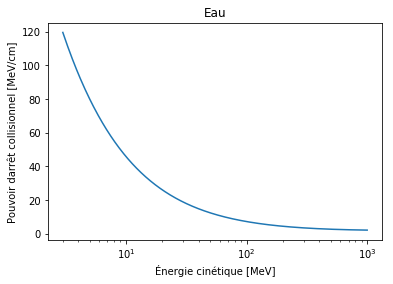

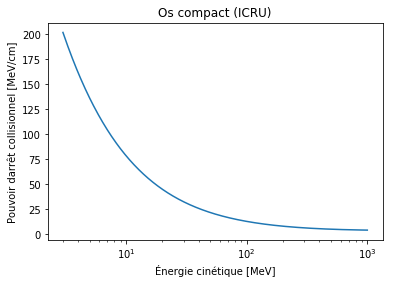

In [5]:
T = np.linspace(3, 1000, 10000)  # en MeV
ne_eau = densite_eau(1.00000,1,1.00794,8,15.9994)
ne_os = densite_os(1.85000,1,1.00794,6,12.0107,7,14.0067,8,15.9994,12,24.3050,15,30.973762,16,32.065,20,40.078)

plt.plot(T, pouvoir_arret(T*1e6, ne_eau, 75)/1e6)
plt.title("Eau")
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel('Pouvoir d''arrêt collisionnel [MeV/cm]')
plt.xscale('log')
plt.show()

plt.plot(T, pouvoir_arret(T*1e6, ne_os, 91.9)/1e6)
plt.title("Os compact (ICRU)")
plt.xlabel("Énergie cinétique [MeV]")
plt.ylabel('Pouvoir d''arrêt collisionnel [MeV/cm]')
plt.xscale('log')
plt.show()

# Portée des protons dans la matière

## Question 2 :
La portée des protons en ligne droite dans la matière est approximée par une décélération continue (CSDA) et est donnée par l'équation suivante :
\begin{align}
R_{CSDA} = \int^{T_i}_0 \frac{dT'}{\frac{S_{col}}{\rho}},
\end{align}
soit l'intégrale de l'inverse du pouvoir d'arrêt collisionnel massique par rapport à l'énergie transférée à l'électron de l'atome.
L'homogénéité dimensionnelle de la portée des protons en ligne droite est déterminée en vérifiant les unités de part et d'autre de l'égalité. Selon l'outil PSTAR du NIST, les unités sont des g/cm^2. On développe le côté droit de l'égalité afin de vérifier l'homogénéité dimensionnelle pour des protons de plus de 3 MeV.
\begin{align}
R_{CSDA} = \int^{T_i}_0 \frac{dT'}{\frac{S_{col}}{\rho}} = \int^{T_i}_0 \frac{\rho dT'}{2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2} \left [\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right)-2\beta^2\right]} = \int^{T_i}_0 \frac{dT'}{-\left(\frac{dT}{\rho dx}\right)_{col}}.
\end{align}
Les unités sont donc ;
\begin{align}
\left[\frac{g}{cm^2}\right] = \int^{T_i}_0 dT'\frac{\left[\frac{g}{cm^3}\right]}{\left[\frac{MeV}{cm}\right]} = \int^{T_i}_0 dT'\left[\frac{g}{MeV cm^2}\right].
\end{align}
En intégrant cette fonction par rapport à l'énergie, on obtient les mêmes unités de part et d'autre de l'égalité ;
\begin{align}
\left[\frac{g}{cm^2}\right] = \left[\frac{g}{cm^2}\right],
\end{align}
donc l'homogénéité dimensionnelle de la portée des protons en ligne droite est démontrée.

## Question 3 :
Le pouvoir d'arrêt collisionnel total pour une particule donnée est composé de l'arrêt collisionnel électronique (ionisation des atomes) et de l'arrêt collisionnel nucléaire (diffusion sur des noyaux). Il est également possible que cette particule donnée subisse des pertes radiatives (Bremsstrahlung, production de paires ou intéraction photoélectrique) durant sa trajectoire dans la matière. 

Pour les protons dans la gamme des énergies de la protonthérapie, le pouvoir d'arrêt collisionnel total peut être approximé par le pouvoir d'arrêt collisionnel électronique puisque tous deux sont du même ordre de grandeur peu importe l'énergie du proton. En effet, si on base notre analyse sur les résultats de l'outil PSTAR du NIST pour l'eau liquide, on remarque que ces deux derniers présentent un écart d'au plus 0.08%, tandis que l'arrêt collisionnel nucléaire est inférieur par un facteur d'environ $10^{3}$ pour les énergies de la protonthérapie puis ce cet écart s'accroît rapidement jusqu'à $10^{5}$ pour des énergies supérieures. Le pouvoir d'arrêt collisionnel nucléaire peut donc être négligé. On note que des résultats du même ordre de grandeur sont obtenus pour l'os compact (ICRU) à l'aide de cet outil, ce qui confirme que cette approximation est valide aussi dans ce milieu.

Quant aux pertes radiatives, elles sont davantage présentes dans le comportement des particules légères telles que les électrons et les positrons qui subissent des pertes non négligeables mêmes pour des faibles énergies de l'ordre de $10^{-2}$ MeV. Dans le cas des protons, les pertes radiatives sont présentes pour des énergies de l'ordre de $10^{3}$ MeV et prennent plus d'importance pour des énergies encore plus élevées qui ne font pas partie de la gamme des énergies utilisée protonthérapie. C'est la masse élevée des protons qui réduit l'effet des pertes radiatives en protonthérapie.

## Question 4 :
Il est nécessaire d'employer une méthode numérique pour calculer la portée des protons car il n'est pas possible de calculer cette dernière de façon analytique. On a donc recours à l'intégration numérique par la méthode des trapèzes et par la méthode de Simpson. Tel que présenté à la question 1, le pouvoir d'arrêt collisionnel varie en fonction de l'énergie des protons et du milieu traversé par le faisceau de protons. La portée des protons dépend entre autres des énergies de faisceau sélectionnées, de la forme et de la profondeur de la tumeur à traiter, de l'anatomie ainsi que de la morphologie spécifique du patient. Il s'agit de calculs complexes et laborieux qui nécessitent une exactitude au millimètre ou dixième de millimètre près afin de préserver les tissus sains. La calul numérique de la portée des protons permet d'économiser du temps lors de la préparation du traitement de chaque patient et de s'assurer que la ballistique du traitement est exacte et optimale.

## Question 5 :

Comme mentionné en introduction, deux méthodes d'intrégration seront utilisés ici : la méthode des trapèzes et la méthode de Simpson. Leur algorithme respectif est écrit ci-dessous.

In [6]:
def methode_trapezes(fonction, a, b, N, *args):  
    # fonction = celle à intégrer, a = 1ère borne d'intégration, b = 2e borne d'intégration, N = nombre de tranches
    if N == 0:   # Pour éviter une division par zéro (au calcul de h)
        return 0
    
    x = np.linspace(a, b, N+1) 
    h = (b - a) / N  # épaisseur de chaque tranche
    somme = 0
    for i in x[1:-1]:
        somme += fonction(i, *args)
    return h * (1/2*fonction(x[0], *args) + 1/2*fonction(x[-1], *args) + somme)

def methode_Simpson(fonction, a, b, N, *args):
    # fonction = celle à intégrer, a = 1ère borne d'intégration, b = 2e borne d'intégration, N = nombre de tranches
    if N == 0:   # Pour éviter une division par zéro (au calcul de h)
        return 0
    
    x = np.linspace(a, b, N+1)
    h = (b - a) / N  # épaisseur de chaque tranche
    somme_impaire = 0
    somme_paire = 0
    for i in x[1:-1:2]:
        somme_impaire += fonction(i, *args)
    for i in x[2:-2:2]:
        somme_paire += fonction(i, *args)
    
    return 1 / 3 * h * (fonction(x[0], *args) + fonction(x[-1], *args) + 4 * somme_impaire + 2 * somme_paire)

In [17]:
def calcul_erreur_trapezes(N_init, fonction, a, b, N, *args):
    I_prec = 0
    erreur = 1
    while erreur > I_prec*1e-16:
        if I_prec == 0:
            I_prec = methode_trapezes(fonction, a, b, N, *args)
            N_tranches = [N_init]
            portee_protons = [I_prec]
            N_i = N_init * 2
        else:
            h_i = (b - a) / N_i
            somme = 0
            for k in range(1, N_i, 2):
                somme += fonction(a+k*h_i, *args)

            I_i = 1/2 * I_prec + h_i * somme
            erreur = 1/3 * (I_i - I_prec)
            N_tranches.append(N_i)
            portee_protons.append(I_i)
            print(erreur, N_i)
            I_prec = I_i
            N_i *= 2
    return N_tranches, portee_protons


""" En cours d'écriture : check pas ça!

def calcul_erreur_Simpson(N_init, fonction, a, b, N, *args):
    I_prec = 0
    erreur = 1
    while erreur > 1e-16:
        if I_prec == 0:
            S_i = 1/3 * (fonction(a, *args) + fonction(b, *args) + somme_paire)
            
            I_prec = methode_trapezes(fonction, a, b, N, *args)
            N_tranches = [N_init]
            portee_protons = [I_prec]
            N_i = N_init * 2
        else:
            h_i = (b - a) / N_i
            somme = 0
            for k in range(1, N_i, 2):
                somme += fonction(a+k*h_i, *args)

            I_i = 1/2 * I_prec + h_i * somme
            erreur = 1/15 * (I_i - I_prec)
            N_tranches.append(N_i)
            portee_protons.append(I_i)
            print(erreur, N_i)
            I_prec = I_i
            N_i *= 2
    return N_tranches, portee_protons
"""

" En cours d'écriture : check pas ça!\n\ndef calcul_erreur_Simpson(N_init, fonction, a, b, N, *args):\n    I_prec = 0\n    erreur = 1\n    while erreur > 1e-16:\n        if I_prec == 0:\n            S_i = 1/3 * (fonction(a, *args) + fonction(b, *args) + somme_paire)\n            \n            I_prec = methode_trapezes(fonction, a, b, N, *args)\n            N_tranches = [N_init]\n            portee_protons = [I_prec]\n            N_i = N_init * 2\n        else:\n            h_i = (b - a) / N_i\n            somme = 0\n            for k in range(1, N_i, 2):\n                somme += fonction(a+k*h_i, *args)\n\n            I_i = 1/2 * I_prec + h_i * somme\n            erreur = 1/15 * (I_i - I_prec)\n            N_tranches.append(N_i)\n            portee_protons.append(I_i)\n            print(erreur, N_i)\n            I_prec = I_i\n            N_i *= 2\n    return N_tranches, portee_protons\n"

In [18]:
portee_eau_trapezes = calcul_erreur_trapezes(500, pouvoir_arret, 3e6, 150e6, 10, ne_eau, 75, -1, 1)

0.003712645610405592 1000
0.0018557349069379114 2000
0.0009277204659188243 4000
0.0004638234852597141 8000
0.00023190255565512055 16000
0.00011594898108076752 32000
5.797391635316747e-05 64000
2.898681466471468e-05 128000
1.4493371403763906e-05 256000
7.246676750819839e-06 512000
3.623336146082086e-06 1024000
1.8116675709241765e-06 2048000
9.058335474302718e-07 4096000
4.5291666950220133e-07 8192000
2.2645853192670984e-07 16384000


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(portee_eau_trapezes[0], portee_eau_trapezes[1])
plt.title("Eau")
plt.xlabel("Nombre de tranches")
plt.ylabel("Portée des protons [g/cm$^2$]")
plt.show()

In [12]:
def précision_machine(methode,a,b,rho,*args): # Déterminer le nombre de tranches pour atteindre la précision machine
    valeur = 0
    nouvelle_valeur = 0
    i = 1000
    it = 0
    while True:
        nouvelle_valeur = methode(pouvoir_arret,a,b,i,*args)*rho
        if i == 1000:
            valeur = nouvelle_valeur
        else: # déterminer si la nouvelle valeur est à ± 1e-16 la valeur précédente
            if (nouvelle_valeur < valeur+1e-16) and (nouvelle_valeur > valeur-1e-16):
                break
            else:
                valeur = nouvelle_valeur
                
        if i > 10000000: # Éviter les itérations infini dans le cas de "bug"
            break
        i *= 2 # On double le nombre de tranche à chaque itération
        it += 1
        print(i,valeur)
    return i,it, valeur

#print(précision_machine(methode_trapezes,3e6, 150e6,1, ne_eau, 75,-1)) # Servent à déterminer le nombre de tranche pour la précision machine
#print(précision_machine(methode_Simpson,3e6, 150e6,1, ne_eau, 75,-1))
#print(précision_machine(methode_trapezes,3e6, 150e6,1.85, ne_os, 91.9,-1))
#print(précision_machine(methode_Simpson,3e6, 150e6,1.85, ne_os, 91.9,-1))

print(f"Le nombre de tranches nécessaire pour atteindre la précision machine pour la méthode trapèze de la portée dans l'eau est de:\n{précision_machine(methode_trapezes,3e6, 150e6,1, ne_eau, 75,-1)[0]}.")
print(f"Le nombre de tranches nécessaire pour atteindre la précision machine pour la méthode Simpson de la portée dans l'eau est de:\n{précision_machine(methode_Simpson,3e6, 150e6,1, ne_eau, 75,-1)[0]}.")
print("Les mêmes valeurs sont trouvé pour la portée dans l'os.")

2000 15.75331231758515
4000 15.753314081458056
8000 15.753314522431827
16000 15.753314632675673
32000 15.75331466023668
64000 15.753314667126869
128000 15.753314668849354
256000 15.753314669280044
512000 15.753314669387883
1024000 15.753314669414719
2048000 15.75331466942138
4096000 15.753314669422416


KeyboardInterrupt: 

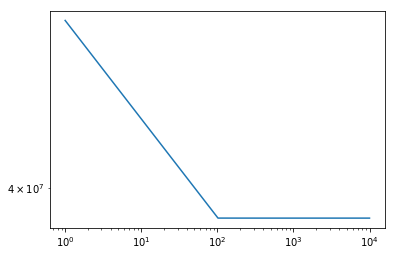

In [54]:

a = 3e6
b = 150e6
n = 1e-6
N = np.linspace(1,10000,100, dtype = int)
data = []
for i in N:
    h = (b - a) / i

    v_a0 = pouvoir_arret(a,ne_eau,75,-1)
    v_a1 = pouvoir_arret(a+n,ne_eau,75,-1)
    v_a2 = pouvoir_arret(a-n,ne_eau,75,-1)

    p_a1 = (v_a0-v_a1)/(n)
    p_a2 = (v_a0-v_a2)/(-n)
    da = (p_a1+p_a2)/2 # dérivée autour de a

    v_b0 = pouvoir_arret(150e6,ne_eau,75,-1)
    v_b1 = pouvoir_arret(150e6+n,ne_eau,75,-1)
    v_b2 = pouvoir_arret(150e6-n,ne_eau,75,-1)

    p_b1 = (v_b0-v_b1)/(n)
    p_b2 = (v_b0-v_b2)/(-n)
    db = (p_b1+p_b2)/2 # dérivée autour de b

    data.append((b-a)*np.sqrt(abs(da-db)/(12*methode_trapezes(pouvoir_arret,a, b, i, ne_eau, 75,-1)*1e-16)))
plt.plot(N,data)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [28]:
Simpson_eau = [methode_Simpson(pouvoir_arret, 3e6, 150e6, 2**i, ne_eau, 75,-1)*1 for i in range(int(précision_machine(methode_Simpson,3e6, 150e6,1, ne_eau, 75,-1)[1]))]
Simpson_os = [methode_Simpson(pouvoir_arret, 3e6, 150e6, 2**i, ne_os, 91.9,-1)*1.85 for i in range(int(précision_machine(methode_Simpson,3e6, 150e6,1.85, ne_os, 91.9,-1)[1]))]
trapeze_eau = [methode_trapezes(pouvoir_arret, 3e6, 150e6, 2**i, ne_eau, 75,-1)*1 for i in range(int(précision_machine(methode_trapezes,3e6, 150e6,1, ne_eau, 75,-1)[1]))]
trapeze_os = [methode_trapezes(pouvoir_arret, 3e6, 150e6, 2**i, ne_os, 91.9,-1)*1.85 for i in range(int(précision_machine(methode_trapezes,3e6, 150e6,1.85, ne_os, 75,-1)[1]))]
plt.rcParams["figure.figsize"]=20,10
plt.rcParams.update({'font.size': 15})
#print(trapeze_eau)

plt.subplot(421)
plt.plot([2**i for i in range(précision_machine(methode_trapezes,3e6, 150e6,1, ne_eau, 75,-1)[1])],trapeze_eau)
plt.xscale("log")
plt.xlabel("Nombre de tranche [-]")
plt.ylabel("Portée obtenue [$\\frac{g}{cm^2}$]")
plt.title("Eau trapèze")

plt.subplot(423)
plt.plot([2**i for i in range(précision_machine(methode_Simpson,3e6, 150e6,1, ne_eau, 75,-1)[1])],Simpson_eau)
plt.xscale("log")
plt.xlabel("Nombre de tranche [-]")
plt.ylabel("Portée obtenue [$\\frac{g}{cm^2}$]")
plt.title("Eau Simpson")

plt.subplot(422)
plt.plot([2**i for i in range(précision_machine(methode_trapezes,3e6, 150e6,1.85, ne_os, 91.9,-1)[1])],trapeze_os)
plt.xscale("log")
plt.xlabel("Nombre de tranche [-]")
plt.ylabel("Portée obtenue [$\\frac{g}{cm^2}$]")
plt.title("Os trapèze")

plt.subplot(424)
plt.plot([2**i for i in range(précision_machine(methode_Simpson,3e6, 150e6,1.85, ne_os, 91.9,-1)[1])],Simpson_os)
plt.xscale("log")
plt.xlabel("Nombre de tranche [-]")
plt.ylabel("Portée obtenue [$\\frac{g}{cm^2}$]")
plt.title("Os Simpson")
plt.tight_layout()
plt.show()


2000 15.753314669296948
4000 15.753314669415676
8000 15.75331466942311
16000 15.75331466942357
32000 15.753314669423618
64000 15.753314669423636
128000 15.753314669423615
256000 15.753314669423732
512000 15.753314669423577


KeyboardInterrupt: 

## Question 6 :

On obtient l'expression analytique de la dérivée du pouvoir d'arrêt collisionnel en fonction de T en l'exprimant en fonction de $\gamma$ et en utilisant le théorème de dérivation des fonctions composées. Le pouvoir d'arrêt collisionnel en fonction de T pour des protons de plus de 3 MeV est donné par

\begin{align}
S_{col}(T) = 2\pi r_e^2 m_e c^2 n_e \frac{1}{\beta^2} \left [\ln\left(\frac{2 m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right)-2\beta^2\right].
\end{align}

Avec les simplifications et substitutions suggérées dans l'énoncé, on obtient les équations suivantes.

\begin{align}
S_{col}(T) = U \frac{1}{\beta^2} \left [\ln\left(\frac{a (\gamma^2-1)}{I^2} \frac {a (\gamma^2-1)}{\gamma \delta + b}\right)-2\beta^2\right]
\end{align}

\begin{align}
S_{col}(T) = U \frac{1}{\beta^2} \left [\ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right)-2\beta^2\right]
\end{align}

\begin{align}
S_{col}(T) = \frac{U \gamma^2}{(\gamma^2-1)} \left [\ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right)-2\frac{(\gamma^2-1)}{\gamma^2}\right]
\end{align}

\begin{align}
S_{col}(T) = \frac{U \gamma^2}{(\gamma^2-1)} \ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right)-2U
\end{align}

Sachant que $\gamma$ peut s'exprimer en fonction de $T$ comme suit

\begin{align}
\gamma = \frac{T}{m_pc^2}+1,
\end{align}

on peut se servir du théorème de dérivation des fonctions composées pour obtenir la dérivée du pouvoir d'arrêt collisionnel en fonction de T de la manière suivante.

\begin{align}
\frac{dS_{col}}{dT} = \frac{dS_{col}}{d\gamma}\frac{d\gamma}{dT} 
\end{align}

La première dérivée est 

\begin{align}
\frac{dS_{col}}{d\gamma} = U \frac{d}{d\gamma} \left[\frac{\gamma^2}{(\gamma^2-1)} ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right) \right]
\end{align}

\begin{align}
\frac{dS_{col}}{d\gamma} = U \Bigg(\left[\frac{\gamma(\gamma^2-1)-\gamma^2(2\gamma)}{(\gamma^2-1)^2} ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right) \right] + \left[\frac{\gamma^2}{(\gamma^2-1)}\frac{\gamma \delta + b}{k (\gamma^2-1)^2}\frac{4k\gamma\left(\gamma^2-1\right)\left(\gamma \delta + b \right) - k\delta\left(\gamma^2-1\right)^2}{(\gamma \delta + b)^2} \right]\Bigg)
\end{align}

\begin{align}
\frac{dS_{col}}{d\gamma} = U \Bigg(\left[\frac{\gamma(\gamma^2-1)-2\gamma^3}{(\gamma^2-1)^2} ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right) \right] + \left[\frac{\gamma^2(\gamma \delta + b)}{k(\gamma^2-1)^3}\frac{4k\gamma(\gamma^2-1)(\gamma \delta + b) - k\delta(\gamma^2-1)^2}{(\gamma \delta + b)^2} \right]\Bigg).
\end{align}

La deuxième dérivée est simplement 

\begin{align}
\frac{d\gamma}{dT} = \frac{1}{m_pc^2}.
\end{align}

Donc selon le théorème de dérivation des fonctions composées, on obtient

\begin{align}
\frac{dS_{col}}{dT} = \frac{U}{m_pc^2} \Bigg(\left[\frac{\gamma(\gamma^2-1)-2\gamma^3}{(\gamma^2-1)^2} ln\left(\frac{k (\gamma^2-1)^2}{\gamma \delta + b}\right) \right] + \left[\frac{\gamma^2(\gamma \delta + b)}{k(\gamma^2-1)^3}\frac{4k\gamma(\gamma^2-1)(\gamma \delta + b) - k\delta(\gamma^2-1)^2}{(\gamma \delta + b)^2} \right]\Bigg).
\end{align}

## Question 7 :

In [49]:
def erreur_approx_trapeze(fonction, a, b,N,n, *args): # n est la distance des points utilisé pour faire la dérivée
    
    h = (b - a) / N

    v_a0 = fonction(a,*args)
    v_a1 = fonction(a+n,*args)
    v_a2 = fonction(a-n,*args)
    
    p_a1 = (v_a0-v_a1)/(n)
    p_a2 = (v_a0-v_a2)/(-n)
    da = (p_a1+p_a2)/2 # dérivée autour de a
    
    v_b0 = fonction(b,*args)
    v_b1 = fonction(b+n,*args)
    v_b2 = fonction(b-n,*args)
    
    p_b1 = (v_b0-v_b1)/(n)
    p_b2 = (v_b0-v_b2)/(-n)
    db = (p_b1+p_b2)/2 # dérivée autour de b
    print(p_a1,p_a2)
    return 1/12*h**2*(da-db)
print(erreur_approx_trapeze(pouvoir_arret, 3e6, 150e6, 39665935,1e-7, ne_eau, 75,-1))
print(pouvoir_arret(3e6,ne_eau,75,-1))

0.0 -4.4667753077863494e-15
-1.4958066702419278e-15
8.367659897026891e-09


# Optimisation

# Énergie déposée